In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.15.0


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [5]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False
  

  
folders = glob('Datasets/Train/*')
  

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

2024-03-10 17:25:23.421187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-10 17:25:23.421230: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-10 17:25:23.421240: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-10 17:25:23.421301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-10 17:25:23.421326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')



Found 309 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [8]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    
    validation_steps = len(test_set)
)

Epoch 1/5


2024-03-10 17:25:34.277447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 12s 761ms/step - loss: 0.7434 - accuracy: 0.7217 - val_loss: 0.2585 - val_accuracy: 0.9433
Epoch 2/5
16/16 [==============================] - 11s 729ms/step - loss: 0.1262 - accuracy: 0.9644 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 11s 717ms/step - loss: 0.0473 - accuracy: 0.9903 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 11s 718ms/step - loss: 0.0310 - accuracy: 0.9935 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 12s 750ms/step - loss: 0.0303 - accuracy: 0.9968 - val_loss: 0.0081 - val_accuracy: 1.0000


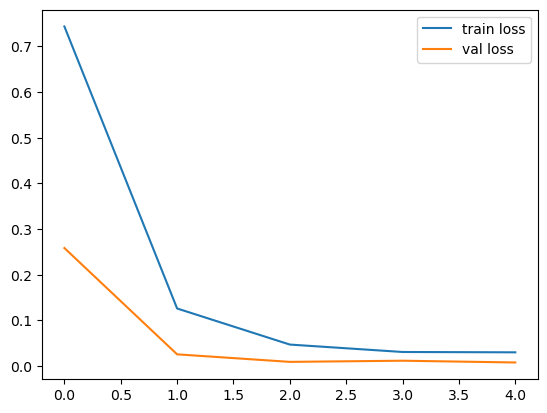

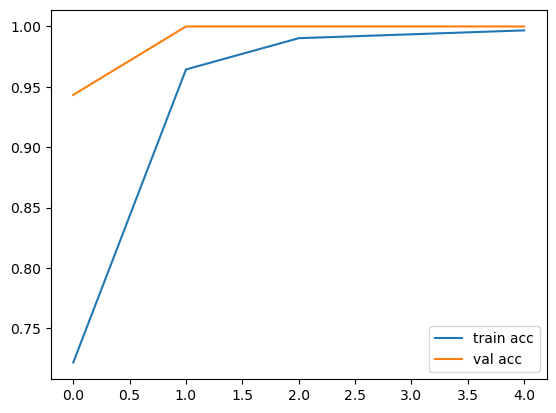

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('model1.h5')

2024-03-15 23:44:53.148073: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-15 23:44:53.148149: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-15 23:44:53.148161: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-15 23:44:53.148520: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-15 23:44:53.148878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

2024-03-15 23:44:54.581662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


192/192 [==============================] - 139s 720ms/step - loss: 0.6365 - accuracy: 0.8648 - val_loss: 0.0403 - val_accuracy: 0.9917
Epoch 2/20
192/192 [==============================] - 155s 808ms/step - loss: 0.0394 - accuracy: 0.9936 - val_loss: 0.0381 - val_accuracy: 0.9899
Epoch 3/20
192/192 [==============================] - 166s 865ms/step - loss: 0.0171 - accuracy: 0.9979 - val_loss: 0.0095 - val_accuracy: 0.9991
Epoch 4/20
192/192 [==============================] - 166s 863ms/step - loss: 0.0091 - accuracy: 0.9989 - val_loss: 0.0249 - val_accuracy: 0.9917
Epoch 5/20
192/192 [==============================] - 170s 886ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.0314 - val_accuracy: 0.9872
Epoch 6/20
192/192 [==============================] - 168s 877ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0324 - val_accuracy: 0.9881


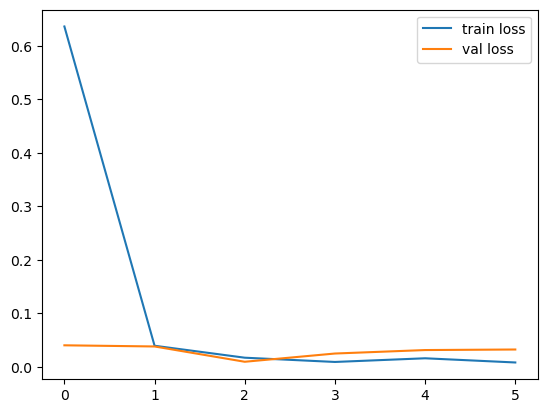

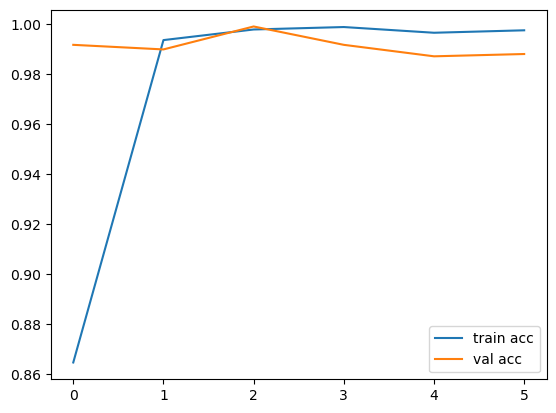

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
from keras.callbacks import EarlyStopping

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

folders = glob('Datasets/Train/*')
num_classes = len(folders)

x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Define EarlyStopping callback
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (validation loss)
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights to the best configuration
)

epochs = 20  # Increase the number of epochs to allow early stopping to work effectively
history = model.fit(training_set, validation_data=test_set, epochs=epochs, steps_per_epoch=len(training_set), validation_steps=len(test_set), callbacks=[early_stopping_monitor])

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.save('model_rgb_frozen.h5')

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

model = load_model('model_rgb_frozen.h5')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

test_datagen = ImageDataGenerator(rescale=1./255)

test_path = 'Datasets/Test'

test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_set)
print("Test Accuracy:", test_accuracy)

2024-03-25 07:13:27.677224: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-25 07:13:27.677249: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-25 07:13:27.677254: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-25 07:13:27.677283: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-25 07:13:27.677295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 1090 images belonging to 36 classes.


2024-03-25 07:13:28.449704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 20s 554ms/step - loss: 0.0095 - accuracy: 0.9991
Test Accuracy: 0.9990825653076172


In [13]:
# Flow images from the directory
test_path = 'Datasets/Test'
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Print the class labels
print("Classes:", test_set.class_indices)

Found 1090 images belonging to 36 classes.
Classes: {'AVB': 0, 'Abhijith': 1, 'Abhinava': 2, 'Abhinavrijit': 3, 'Adithyaraj': 4, 'Adwaith': 5, 'Afras': 6, 'Aneena': 7, 'Anirudh': 8, 'Ansal': 9, 'Aquin': 10, 'Arjunanikuttan': 11, 'Arjunv': 12, 'Ashfin': 13, 'Athira': 14, 'Chandana': 15, 'Devalakshmy': 16, 'Devananda': 17, 'Dinasree': 18, 'Firoza': 19, 'Hariprasadh': 20, 'Krishnendhu': 21, 'Malavika': 22, 'Manhal': 23, 'Maria': 24, 'Muralee': 25, 'Nandhitha': 26, 'Parvati': 27, 'Rebin': 28, 'Riya': 29, 'Rizin': 30, 'Sada': 31, 'Sanjo': 32, 'Shibla': 33, 'Sreelakshmi': 34, 'Stephy': 35}
